# Lab 5: Motor & Interrupt
## Objectives
- [x] Learn how to drive the dc motors using the H-bridge driver chip
- [x] Control motor speed with potentiometer via ADC
- [x] Use hall effect sensors to detect speed of motor using polling and interrupt

## Task 1: DC Motor and H-Bridge
### Task1a
Drive a DC motor using the H-bridge chip TB6612.

The direction of the motor is controlled according to the table below

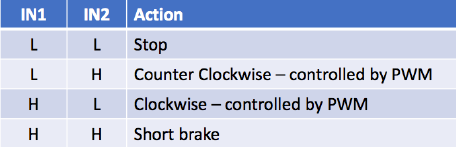

This code moves both motors forward, then backward then stops, utilising the pyb.delay() function. All time related functions for the pyboard can be found here: https://docs.micropython.org/en/latest/library/pyb.html#time-related-functions

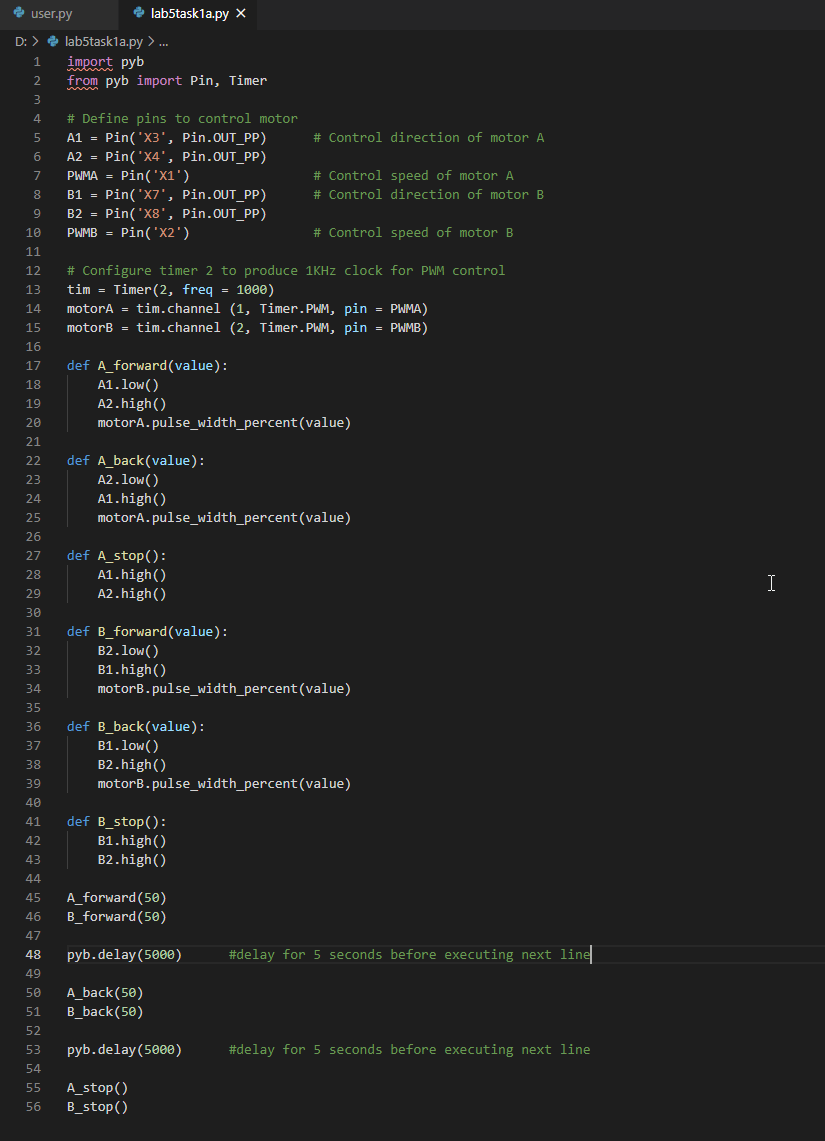

### Task1b
Next for Task 1b, a 10$k\Omega$ potentiometer is used to control the motors to go forward and backward at various speeds, up to the maximum. The potentiometer reads values from 0 to 4095

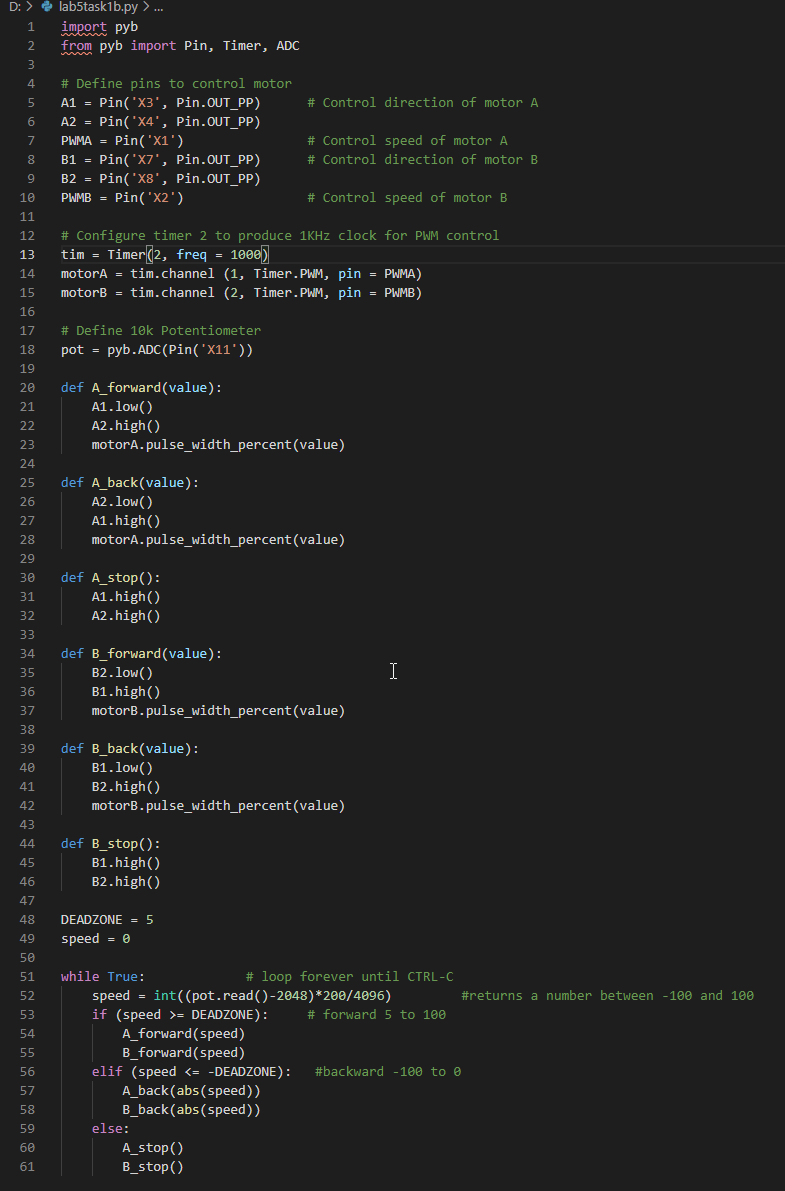

### Task1c
Task 1c displays the potentiometer value on the OLED display. The OLED display dimension is **128x64 and each character is 6 x 8 pixels including a 1-pixel gap on the right and bottom.**

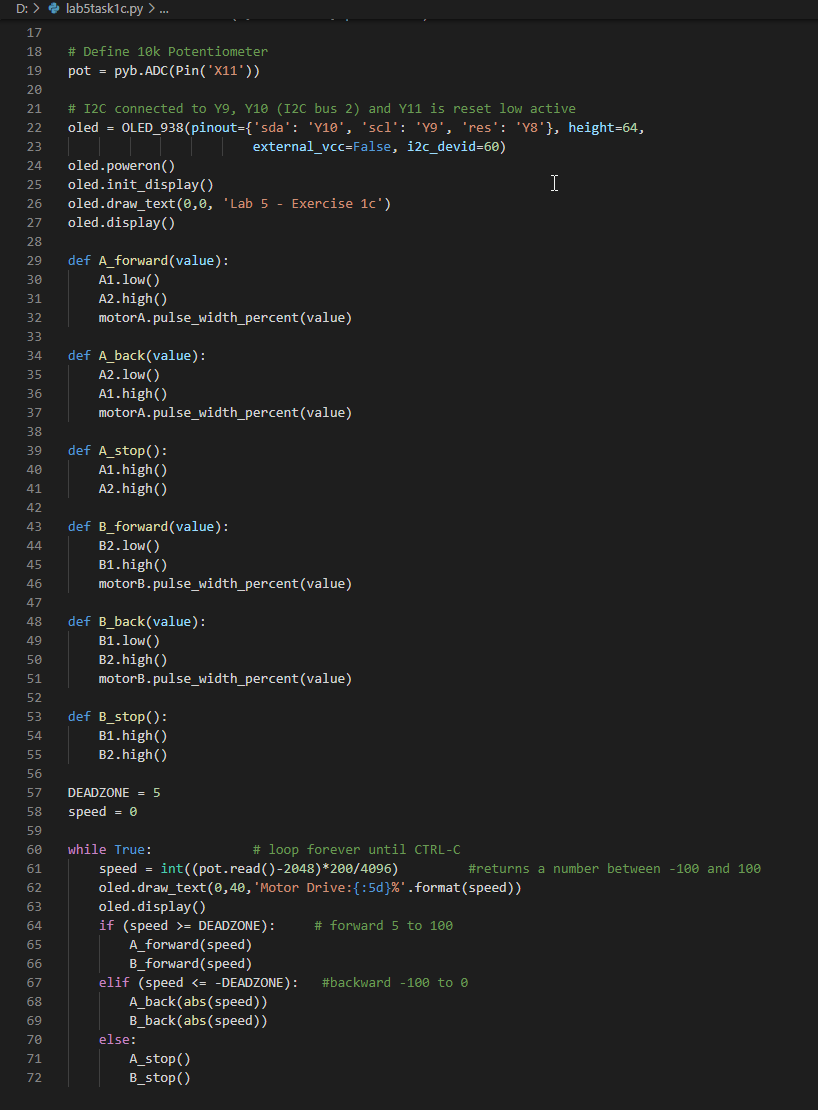

#### A note on OLED syntax
Using placeholders and the format() function is very useful for displaying changing values on the OLED. Refer to this to display different formats within the placeholder curly brackets: https://www.guru99.com/python-string-format.html
e.g. {:5d} means the value will be displayed with up to 5 decimal places hence there will be a large enough space left to display 5 decimal places

## Task 2: Detect the speed of the motor using polling

Each motor has two hall effect sensors and a circular magnet with 13 pairs of N-S poles.
There are two sensors so that we can scheck if the motor is in clockwise or anticlockwise motion i.e. forward or backwards. The square wave signals produced by these two sensors are offset by half a period.

Since the gear ratio of the motor to the circular magnet is 1:30, that means every one revolution of the input shaft will produce 30 revolutions in the output shaft. Therefore for every complete rotation of the output shaft, the hall effect sesnors produce 13 x 30 = 390 square pulses.

### Oscilloscope Readings of the Hall Effect Sensor
When an oscilloscope is connected to a hall effect sensor on one of the motors, the **frequency** recorded varies from 0-1000Hz i.e. a 50% PWM duty cycle would result in a ~500Hz square wave pulse.

The **duty cycle** of the square wave stays constant because the 13 magnets arre evenly spaced. 

The **pulse width** varies inversely with the frequency.
<br></br>
<img src=IMG_6813.jpg width=385px align=left><img src=IMG_6814.jpg width=385px align=left>

On the left the oscilloscope is connected to MotorSense_A_A (pin Y4) while the right is connected to MotorSense_A_B (pin Y5). The phase difference is 90&deg; and Y4 is ahead of Y5, hence the motor is turning clockwise(reverse).

To obtain the **speed of the motor in revolutions per second**, you would need to count the number of square pulses in a period of 1 second and divide it by 390, the number of pulses per revolution. Alternatively we could just count the number of pulses in 100ms and divide it by 39 instead. 

### Displaying Motor speed on the OLED
First these two objects were defined, hall effect sensors A on Motors A and B

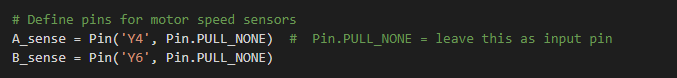

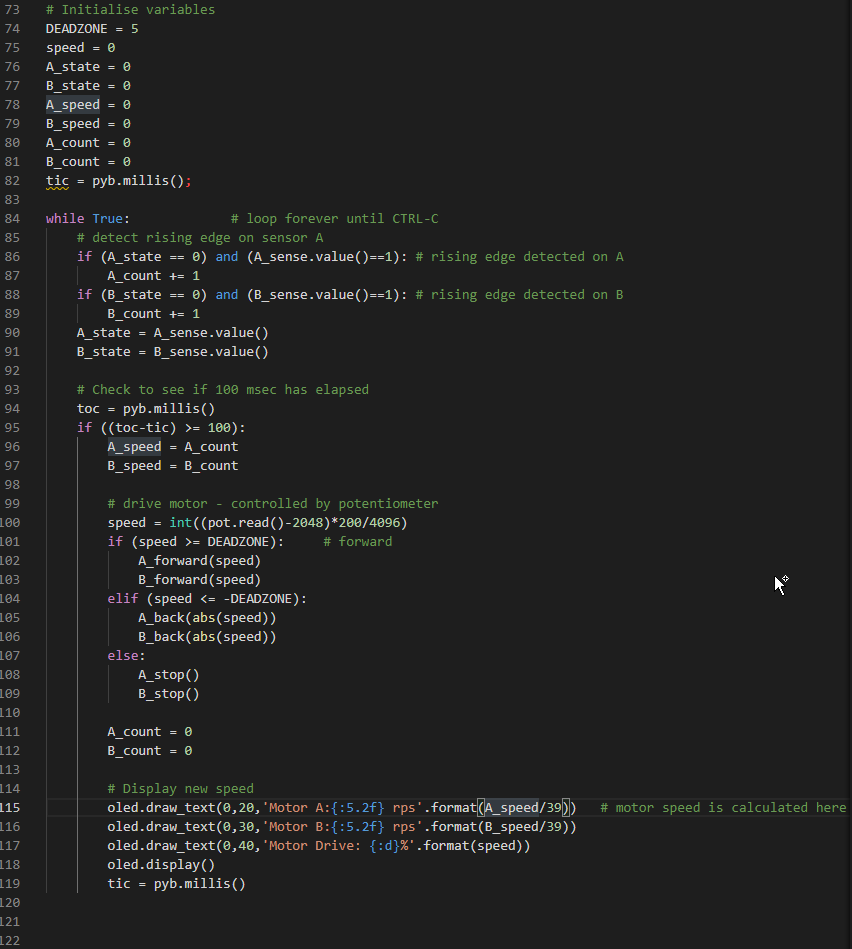

The result
<img src=IMG_6824.jpg>

The reported speed is quite unstable (noisy)

Adding a delay of 1ms results in a completely incorrect reported speed because the system is blindly counting pulses every 1ms in other words polling. The OLED display is slow and the polling loop is missing transitions of the hall effect sensor output.

## Task 3: Speed Measurement using Interrupt

Instead of using an inefficient polling loop, interrupts are used to force the microprocessor to do something immediately (run the ISR) when it occurs (defined in line 102 and 103). When the ISR is completed, the processor returns to where it stopped in the stack. 

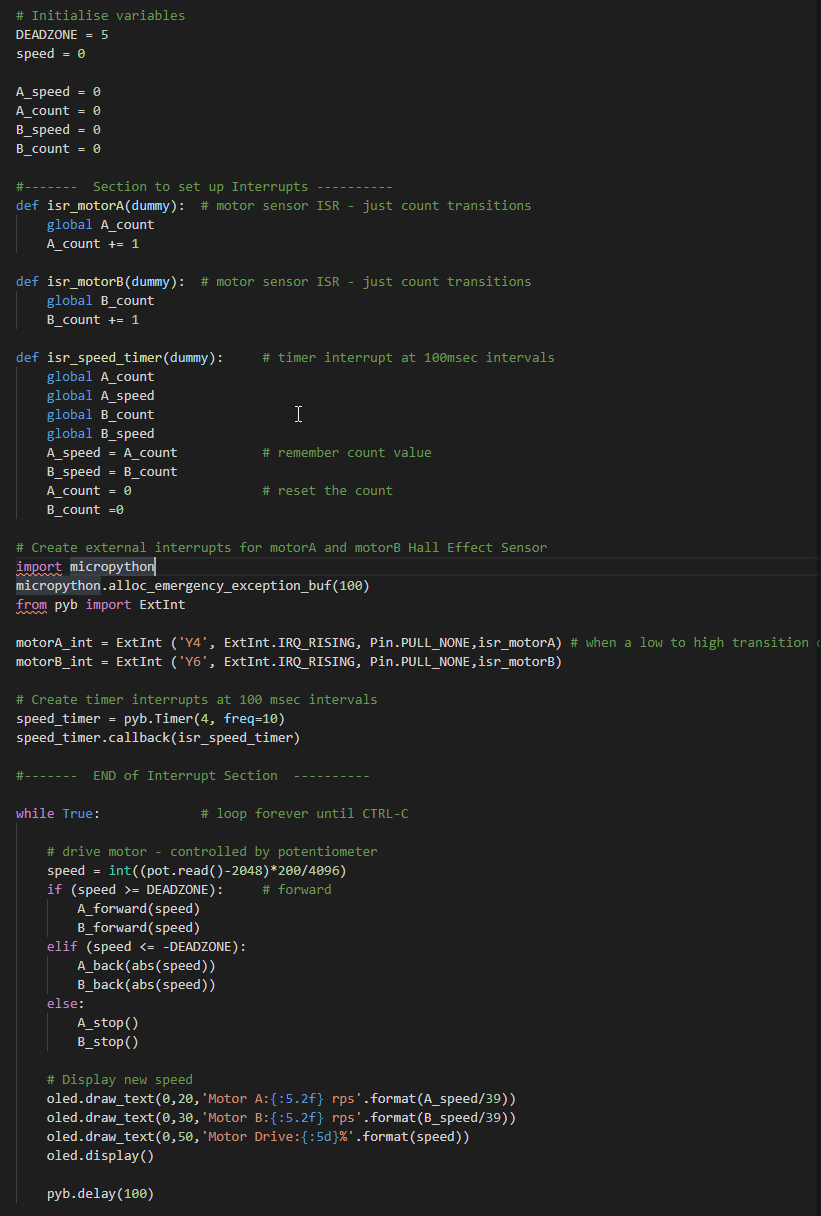

1. There is no more checking of an elapsed time
2. The sensor signal on Y4 and Y6 are not used here i.e. A_sense.value() and B_sense.value() are absent
3. The loop assumes that the variable “A_speed” magically contains the number of transitions on Y4 and reports the rotational speed for motor A.
4. There are three ISRs isr_motorA, isr_motorB and isr_speed_timer
5. isr_motorA and isr_motorB both interrupt the system whenever a rising signal is detected on the Y4 and Y6 sensor signals
6. isr_speed_timer interrupts every 100ms, saves the count values and resets the counters
7. A_count, B_count,A_speed,B_speed are all declared as global variables so that they are visible by the ISRs

Result
<img src=IMG_6826.jpg>